<a href="https://colab.research.google.com/github/superkay13/AMBAR_ML/blob/main/prueba_1_ambar_flores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [18]:
# Paso 1: Cargar los datos
df = pd.read_csv('/content/Base_datoa_version4_04092024_3.csv')

In [19]:
df

,Codigo,Familia,Genero,Especie,Nombre completo,100_A.,100_B.,102_B.,201_A.,201_B.,...,331_A.,332_A.,332_B.,400_A.,401_B.,403_A.,411_A.,500_A.,501_A.,502_A.
0,FC_0001,Arecaceae,Acrocomia,aculeata,Acrocomia aculeata,unisexual,bisexual,superior,present,one to five (1-5),...,one (1),trimerous,trimerous,whorled,three (3),fused (>5%),one (1),absent,no aplica,no aplica
1,FC_0002,Fabaceae,Pseudalbizzia,tomentosa,Pseudalbizzia tomentosa,bisexual,bisexual,NaN,present,one to five (1-5),...,more than two (>2),no aplica,no aplica,whorled,NaN,NaN,NaN,present,glandular,NaN
2,FC_0003,Fabaceae,Pseudalbizzia,tomentosa,Pseudalbizzia tomentosa,bisexual,bisexual,NaN,present,six to ten (6-10),...,more than two (>2),no aplica,no aplica,whorled,NaN,NaN,NaN,present,glandular,NaN
3,FC_0004,Euphorbiaceae,Alchornea,latifolia,Alchornea latifolia,unisexual,unisexual,superior,present,one to five (1-5),...,one (1),tetramerous,tetramerous,whorled,one (1),fused (>5%),one (1),absent,no aplica,no aplica
4,FC_0005,Cannabaceae,Ampelocera,hottlei,Ampelocera hottlei,unisexual,bisexual,NaN,present,one to five (1-5),...,NaN,NaN,NaN,NaN,NaN,fused (>5%),NaN,absent,no aplica,no aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,FC_0176,Caricaceae,Jarilla,heterophylla,Jarilla heterophylla,unisexual,unisexual,no aplica,present,six to ten (6-10),...,NaN,pentamerous,pentamerous,no aplica,no aplica,no aplica,no aplica,absent,no aplica,no aplica
176,FC_0177,Clusiaceae,Garcinia,intermedia,Garcinia intermedia,unisexual,bisexual,no aplica,present,six to ten (6-10),...,NaN,no aplica,no aplica,whorled,four or five (4-5),fused (>5%),one (1),absent,no aplica,no aplica
177,FC_0178,Fagaceae,Quercus,acutifolia,Quercus acutifolia,unisexual,unisexual,no aplica,present,one to five (1-5),...,one (1),pentamerous,pentamerous,no aplica,no aplica,no aplica,no aplica,absent,no aplica,no aplica
178,FC_0179,Fagaceae,Quercus,oleoides,Quercus oleoides,unisexual,unisexual,no aplica,present,one to five (1-5),...,one (1),tetramerous,tetramerous,no aplica,no aplica,no aplica,no aplica,absent,no aplica,no aplica


In [20]:


# Crear un LabelEncoder
le = LabelEncoder()

# Iterar sobre las columnas categóricas y codificarlas
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [21]:
df

,Codigo,Familia,Genero,Especie,Nombre completo,100_A.,100_B.,102_B.,201_A.,201_B.,...,331_A.,332_A.,332_B.,400_A.,401_B.,403_A.,411_A.,500_A.,501_A.,502_A.
0,0,8,0,3,0,1,0,2,1,2,...,2,4,3,2,4,1,1,0,2,3
1,1,30,93,113,110,0,0,3,1,2,...,0,1,0,2,6,3,4,1,1,4
2,2,30,93,113,110,0,0,3,1,3,...,0,1,0,2,6,3,4,1,1,4
3,3,28,1,62,1,1,1,2,1,2,...,2,3,2,2,3,1,1,0,2,3
4,4,16,2,55,2,1,0,3,1,2,...,4,5,4,3,6,1,4,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,19,64,54,74,1,1,1,1,3,...,4,2,1,0,2,2,0,0,2,3
176,176,23,51,57,58,1,0,1,1,3,...,4,1,0,2,0,1,1,0,2,3
177,177,31,96,4,113,1,1,1,1,2,...,2,2,1,0,2,2,0,0,2,3
178,178,31,96,81,114,1,1,1,1,2,...,2,3,2,0,2,2,0,0,2,3


In [25]:
# Eliminar espacios en los nombres de las columnas
df.columns = df.columns.str.strip()
categorias = df.columns[5:]
x=df[categorias]
y=df[["Familia"]]

In [79]:
y

,Familia
0,8
1,30
2,30
3,28
4,16
...,...
175,19
176,23
177,31
178,31


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [31]:
forest=RandomForestClassifier(random_state=42)
forest.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy en el conjunto de prueba: 0.38333333333333336
Recall en el conjunto de prueba: 0.38333333333333336
F1-score en el conjunto de prueba: 0.3132473544973545


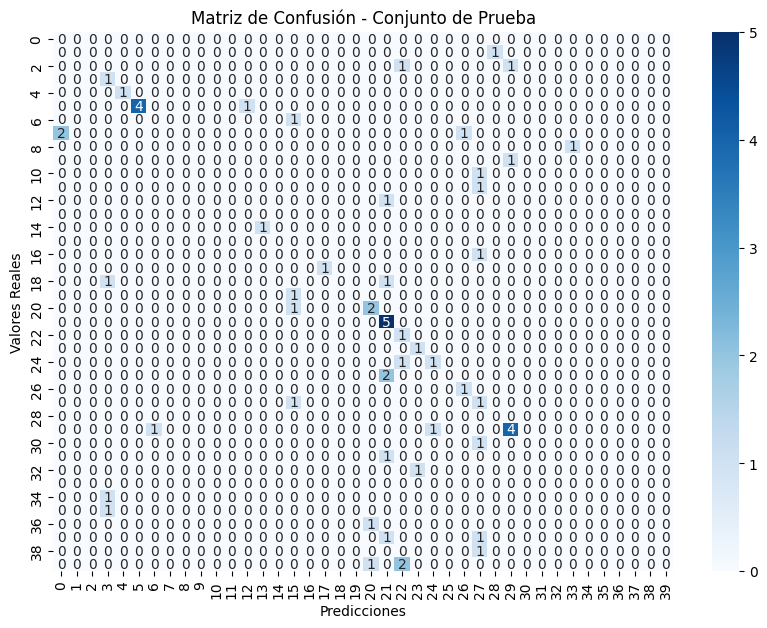

Accuracy en el conjunto de entrenamiento: 1.0
Recall en el conjunto de entrenamiento: 1.0
F1-score en el conjunto de entrenamiento: 1.0


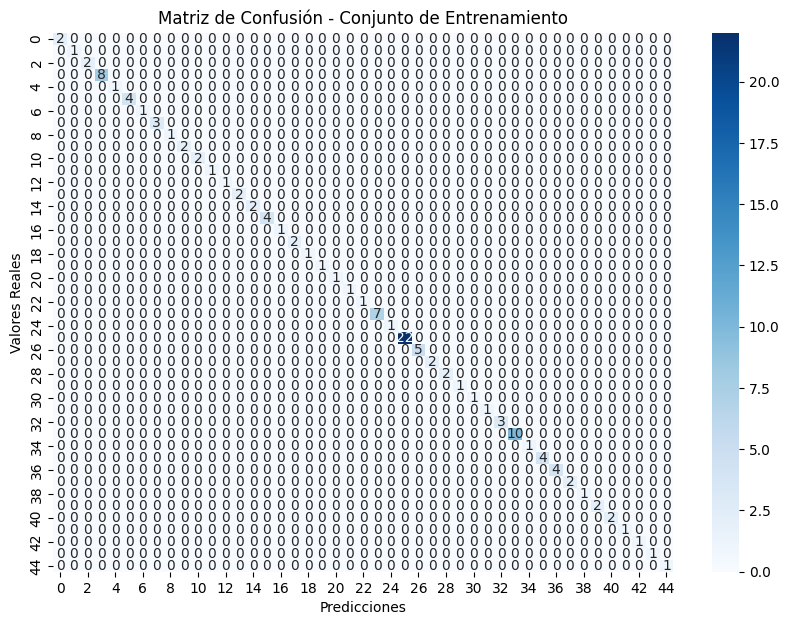

In [36]:


# Predicciones en el conjunto de prueba
y_pred_test = forest.predict(x_test)

# Calcular métricas para el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print(f"Accuracy en el conjunto de prueba: {accuracy_test}")
print(f"Recall en el conjunto de prueba: {recall_test}")
print(f"F1-score en el conjunto de prueba: {f1_test}")

# Matriz de confusión para el conjunto de prueba
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

# Predicciones en el conjunto de entrenamiento
y_pred_train = forest.predict(x_train)

# Calcular métricas para el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

print(f"Accuracy en el conjunto de entrenamiento: {accuracy_train}")
print(f"Recall en el conjunto de entrenamiento: {recall_train}")
print(f"F1-score en el conjunto de entrenamiento: {f1_train}")

# Matriz de confusión para el conjunto de entrenamiento
cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Conjunto de Entrenamiento")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()


Escalar los datos


In [50]:
#Llamamos a nuestro objeto para escalar
scaler = StandardScaler()  #Asignamos la operación a un objeto
x_scaled = scaler.fit_transform(x) #Ajustamos y transformamos nuestros datos


6.908054375445418e-18
1.0


In [47]:
x_scaled = pd.DataFrame(x_scaled, columns=['100_A.', '100_B.', '102_B.', '201_A.', '201_B.', '201_C.', '204_A.',
       '207_A.', '230_A.', '231_A.', '232_A.', '232_B.', '234_A.', '301_B.',
       '301_C.', '305_A.', '311_A.', '312_A.', '313_A.', '330_A.', '331_A.',
       '332_A.', '332_B.', '400_A.', '401_B.', '403_A.', '411_A.', '500_A.',
       '501_A.', '502_A.'])

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=42)

In [52]:
forest=RandomForestClassifier(random_state=42)
forest.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy en el conjunto de prueba: 0.38333333333333336
Recall en el conjunto de prueba: 0.38333333333333336
F1-score en el conjunto de prueba: 0.31078703703703703


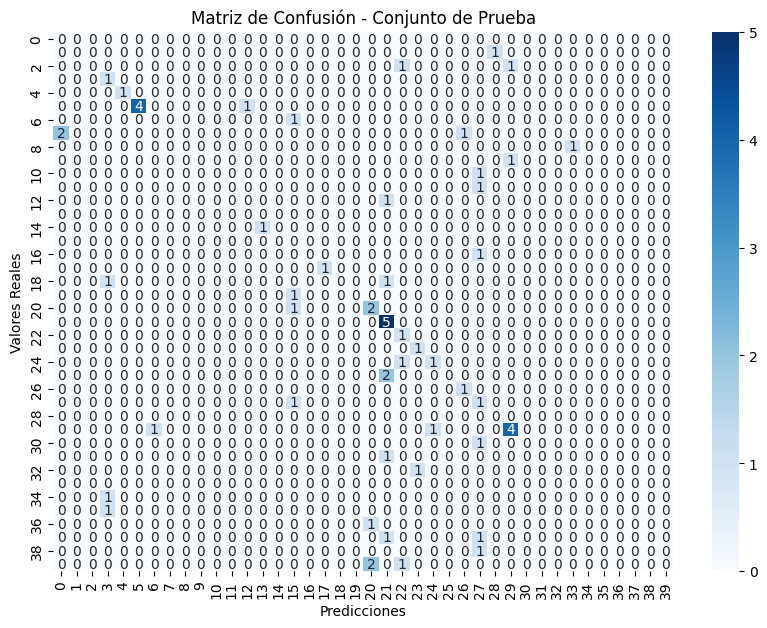

Accuracy en el conjunto de entrenamiento: 1.0
Recall en el conjunto de entrenamiento: 1.0
F1-score en el conjunto de entrenamiento: 1.0


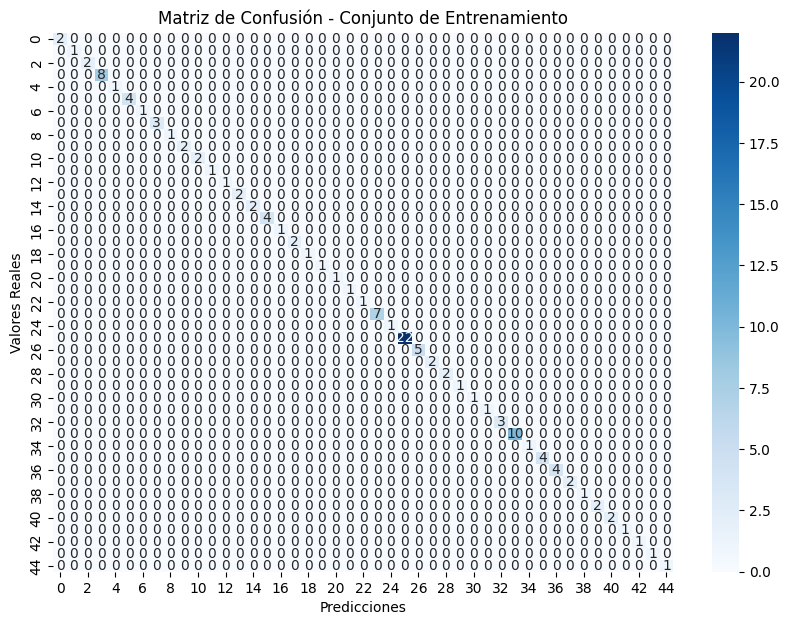

In [53]:

# Predicciones en el conjunto de prueba
y_pred_test = forest.predict(x_test)

# Calcular métricas para el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print(f"Accuracy en el conjunto de prueba: {accuracy_test}")
print(f"Recall en el conjunto de prueba: {recall_test}")
print(f"F1-score en el conjunto de prueba: {f1_test}")

# Matriz de confusión para el conjunto de prueba
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

# Predicciones en el conjunto de entrenamiento
y_pred_train = forest.predict(x_train)

# Calcular métricas para el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

print(f"Accuracy en el conjunto de entrenamiento: {accuracy_train}")
print(f"Recall en el conjunto de entrenamiento: {recall_train}")
print(f"F1-score en el conjunto de entrenamiento: {f1_train}")

# Matriz de confusión para el conjunto de entrenamiento
cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Conjunto de Entrenamiento")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

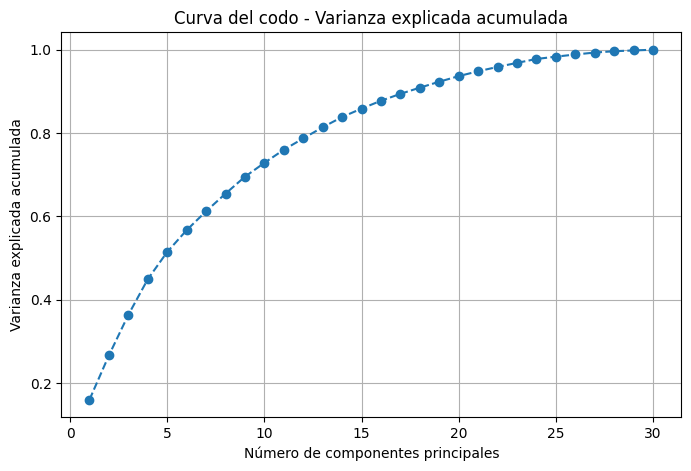

In [54]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Inicializar el modelo PCA
pca = PCA()

# Ajustar PCA a los datos escalados
pca.fit(x_scaled)

# Calcular la varianza explicada acumulada
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Graficar la curva del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Curva del codo - Varianza explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

In [56]:
#Creamos nuestro objeto llamando a la función

pca_2 = PCA(n_components=2) #Al momento de llamar nuestro objeto, le vamos a especificar cuantos componentes deseamos

#Ajustamos nuestro objeto de PCA
pca_2.fit(x_scaled)

PCA(n_components=2)

In [74]:
#Creamos nuestro objeto llamando a la función

pca = PCA(n_components=15) #Al momento de llamar nuestro objeto, le vamos a especificar cuantos componentes deseamos

#Ajustamos nuestro objeto de PCA
pca.fit(x_scaled)

PCA(n_components=15)

In [75]:
#Ahora vamos a transformar nuestros datos a la dimensión del PCA
x_pca_2 = pca_2.transform(x_scaled)
x_pca_2

#Ahora vamos a transformar nuestros datos a la dimensión del PCA
x_pca = pca.transform(x_scaled)
x_pca

array([[-0.52242331,  1.16954972,  2.19764258, ..., -0.33715636,
        -0.65314441, -1.00325497],
       [-1.93110554, -0.37253605, -0.90544219, ...,  1.13300107,
         0.68512325,  0.60784394],
       [-2.39063763, -0.63019621, -1.45172951, ...,  1.05702125,
         0.64069166,  0.49682682],
       ...,
       [ 1.47027234, -1.60646577,  2.08407118, ..., -0.07237448,
         0.75611064,  0.15215496],
       [ 1.26833446, -1.16224851,  2.43800471, ...,  0.07449895,
         0.79356284,  0.34470179],
       [ 0.86445868, -0.273814  ,  3.14587177, ...,  0.36824581,
         0.86846724,  0.72979544]])

In [69]:
df_pca = pd.DataFrame(x_pca_2)
df_pca.columns = ["PC1", "PC2"]

#Y agregar las etiquetas
df_pca["Y"] = df["Familia"]

In [63]:
print(df_pca)

          PC1       PC2   Y
0   -0.522423  1.169550   8
1   -1.931106 -0.372536  30
2   -2.390638 -0.630196  30
3    0.822448  0.497768  28
4   -1.009623  3.385788  16
..        ...       ...  ..
175  0.298058  0.041993  19
176 -0.936359 -1.668208  23
177  1.470272 -1.606466  31
178  1.268334 -1.162249  31
179  0.864459 -0.273814  31

[180 rows x 3 columns]


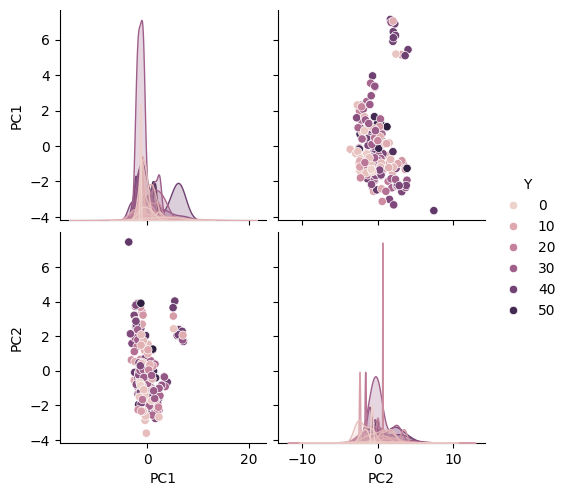

In [70]:
# Y lo podemos gráficar
sns.pairplot(df_pca, hue = "Y")
plt.show()

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.33, random_state=42)

In [77]:
forest=RandomForestClassifier(random_state=42)
forest.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy en el conjunto de prueba: 0.3333333333333333
Recall en el conjunto de prueba: 0.3333333333333333
F1-score en el conjunto de prueba: 0.25802481335090033


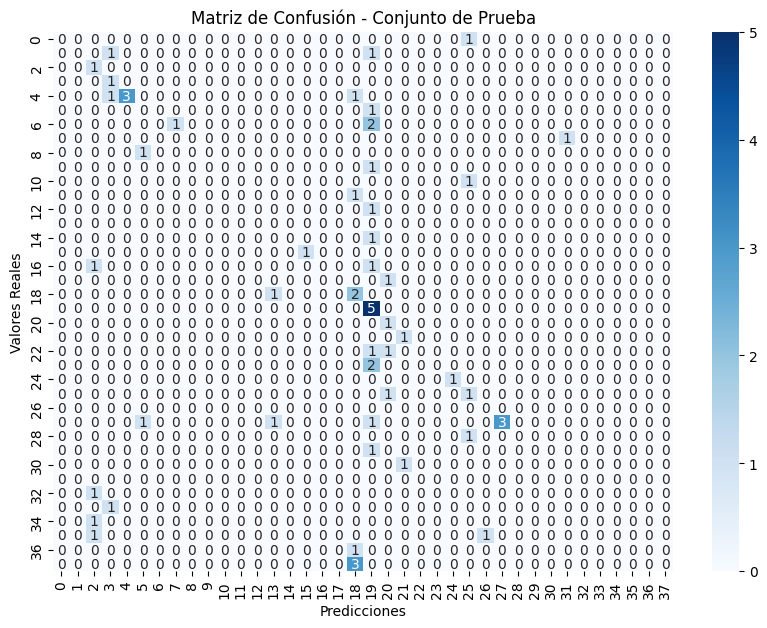

Accuracy en el conjunto de entrenamiento: 1.0
Recall en el conjunto de entrenamiento: 1.0
F1-score en el conjunto de entrenamiento: 1.0


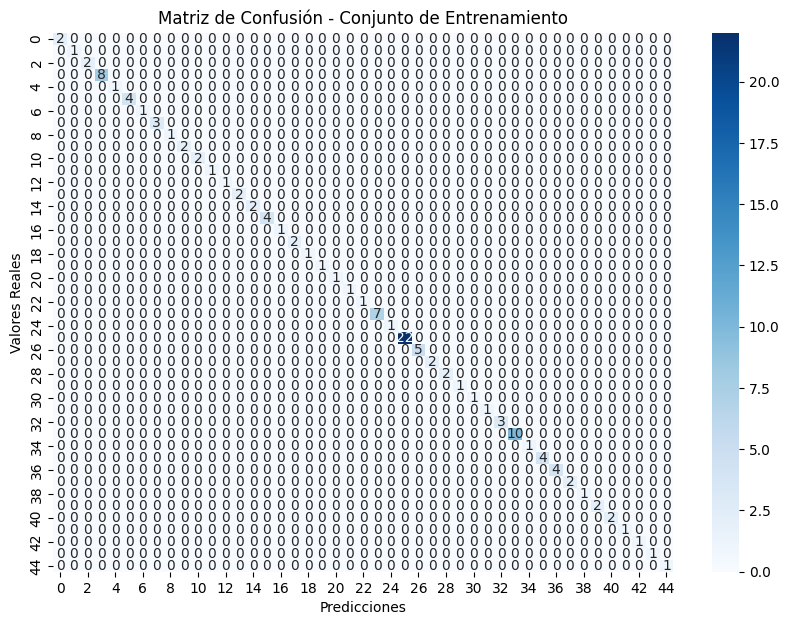

In [78]:

# Predicciones en el conjunto de prueba
y_pred_test = forest.predict(x_test)

# Calcular métricas para el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print(f"Accuracy en el conjunto de prueba: {accuracy_test}")
print(f"Recall en el conjunto de prueba: {recall_test}")
print(f"F1-score en el conjunto de prueba: {f1_test}")

# Matriz de confusión para el conjunto de prueba
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

# Predicciones en el conjunto de entrenamiento
y_pred_train = forest.predict(x_train)

# Calcular métricas para el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

print(f"Accuracy en el conjunto de entrenamiento: {accuracy_train}")
print(f"Recall en el conjunto de entrenamiento: {recall_train}")
print(f"F1-score en el conjunto de entrenamiento: {f1_train}")

# Matriz de confusión para el conjunto de entrenamiento
cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Conjunto de Entrenamiento")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()